In [ ]:
!pip install biopython
import Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Protein Synthesis** \
Protein synthesis is how cells make proteins using 2 stages:
1. Transcription
2. Translation

In [ ]:
# Create DNA sequence and calculate the length
from Bio.Seq import Seq

In [ ]:
dna_seq = Seq('ATGATCTCGTAA')

In [ ]:
len(dna_seq)

12

In [ ]:
dna_seq

Seq('ATGATCTCGTAA')

In [ ]:
# Calculate complement of DNA sequence
# Keep in mind that AT = 2 hydrogen bonds, GC = 3 hydrogen bonds
dna_seq.complement()

Seq('TACTAGAGCATT')

In [ ]:
# Calculate the reverse of the complementing DNA sequence
dna_seq.reverse_complement()

Seq('TTACGAGATCAT')

In [ ]:
# Custom function to calculate the reverse of the complementing DNA sequence
dna_seq.complement()[::-1]

Seq('TTACGAGATCAT')

In [ ]:
dna_seq

Seq('ATGATCTCGTAA')

In [ ]:
# Transcription: DNA to mRNA (writing the message)
dna_seq.transcribe()

Seq('AUGAUCUCGUAA')

In [ ]:
mRNA = dna_seq.transcribe()
mRNA

Seq('AUGAUCUCGUAA')

In [ ]:
# Translation: mRNA to Protein / Amino Acid

# Method 1
mRNA.translate()

Seq('MIS*')

In [ ]:
# Method 2
# Direct translation of DNA to amino acid
dna_seq.translate()

Seq('MIS*')

In [ ]:
# Create our custom stop codon symbol
mRNA.translate(stop_symbol="@")

Seq('MIS@')

In [ ]:
# Back Transcription: mRNA to DNA
mRNA.back_transcribe()

Seq('ATGATCTCGTAA')

In [ ]:
mRNA.back_transcribe() == dna_seq

True

In [ ]:
# Join the steps
dna_seq.transcribe().translate()

Seq('MIS*')

In [ ]:
# Convert amino acid to 3 letter codon
from Bio.SeqUtils import seq3, seq1

In [ ]:
aa = dna_seq.translate()
aa

Seq('MIS*')

In [ ]:
seq3(aa)

'MetIleSerTer'

In [ ]:
# Convert from 3 letters to 1 letter
seq1('MetIleSerTer')

'MIS*'

In [ ]:
seq1(seq3(aa))

'MIS*'

**Amino Acids Codon Table**

In [ ]:
# View our codon table
from Bio.Data import CodonTable

In [ ]:
# check methods and attributes
dir(CodonTable)

['AmbiguousCodonTable',
 'AmbiguousForwardTable',
 'CodonTable',
 'IUPACData',
 'NCBICodonTable',
 'NCBICodonTableDNA',
 'NCBICodonTableRNA',
 'TranslationError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ambiguous_dna_by_id',
 'ambiguous_dna_by_name',
 'ambiguous_generic_by_id',
 'ambiguous_generic_by_name',
 'ambiguous_rna_by_id',
 'ambiguous_rna_by_name',
 'generic_by_id',
 'generic_by_name',
 'list_ambiguous_codons',
 'list_possible_proteins',
 'make_back_table',
 'register_ncbi_table',
 'standard_dna_table',
 'standard_rna_table',
 'unambiguous_dna_by_id',
 'unambiguous_dna_by_name',
 'unambiguous_rna_by_id',
 'unambiguous_rna_by_name']

In [ ]:
# DNA codon table
print(CodonTable.unambiguous_dna_by_name['Standard'])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [ ]:
# RNA codon table
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

**3D Structure of Protein**

In [ ]:
!pip install nglview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!jupyter-nbextension enable nglview --py --sys-prefix

Enabling notebook extension nglview-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
!nglview enable

Enabling notebook extension nglview-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
-\|/-\|/-\|/-Building jupyterlab assets (production, minimized)
-\|/-\|/-\|/-\|/--\|/-\|/-\|-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-An error occurred.
RuntimeError: JupyterLab failed to build
See the log file for details:  /tmp/jupyterlab-debug-5qf7w25w.log


In [ ]:
!jupyter-labextension install nglview-js-widgets

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
-\|/-\|/-\|/Building jupyterlab assets (production, minimized)
-\|/-\|/-\|/-\|-\|/-\|/-\|-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\An error occurred.
RuntimeError: JupyterLab failed to build
See the log file for details:  /tmp/jupyterlab-debug-z3obvy4s.log


In [ ]:
from Bio.PDB import *

pdbl = PDBList()
path = pdbl.retrieve_pdb_file('6lu7')

path

Structure exists: '/content/lu/6lu7.cif' 


'/content/lu/6lu7.cif'

In [ ]:
import os
os.listdir('lu')

['6lu7.cif']

In [ ]:
parser = MMCIFParser()
structure = parser.get_structure('6LU7', path)

/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2416.
  warnings.warn(


In [ ]:
# The overall layout of a Structure object follows the so-called SMCRA
# (Structure / Model / Chain / Residue / Atom) architecture:
structure

<Structure id=6LU7>

In [ ]:
# Models in the structure
model = structure[0]

In [ ]:
# Check for chains
for chain in model:
  print(f'Chain {chain}, Chain_ID{chain.id}')

Chain <Chain id=A>, Chain_IDA
Chain <Chain id=C>, Chain_IDC


In [ ]:
# Check for residue
for chain in model:
  print(f'Chain {chain}, Chain_ID{chain.id}')
  for residue in chain:
    print(residue)

Chain <Chain id=A>, Chain_IDA
<Residue SER het=  resseq=1 icode= >
<Residue GLY het=  resseq=2 icode= >
<Residue PHE het=  resseq=3 icode= >
<Residue ARG het=  resseq=4 icode= >
<Residue LYS het=  resseq=5 icode= >
<Residue MET het=  resseq=6 icode= >
<Residue ALA het=  resseq=7 icode= >
<Residue PHE het=  resseq=8 icode= >
<Residue PRO het=  resseq=9 icode= >
<Residue SER het=  resseq=10 icode= >
<Residue GLY het=  resseq=11 icode= >
<Residue LYS het=  resseq=12 icode= >
<Residue VAL het=  resseq=13 icode= >
<Residue GLU het=  resseq=14 icode= >
<Residue GLY het=  resseq=15 icode= >
<Residue CYS het=  resseq=16 icode= >
<Residue MET het=  resseq=17 icode= >
<Residue VAL het=  resseq=18 icode= >
<Residue GLN het=  resseq=19 icode= >
<Residue VAL het=  resseq=20 icode= >
<Residue THR het=  resseq=21 icode= >
<Residue CYS het=  resseq=22 icode= >
<Residue GLY het=  resseq=23 icode= >
<Residue THR het=  resseq=24 icode= >
<Residue THR het=  resseq=25 icode= >
<Residue THR het=  resseq=26 

In [ ]:
# Check for atoms
for chain in model:
  print(f'Chain {chain}, Chain_ID{chain.id}')
  for residue in chain:
    for atom in residue:
      print(atom)

Chain <Chain id=A>, Chain_IDA
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom CE>
<Atom NZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom SD>
<Atom CE>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom CE>
<Atom NZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom N>
<Atom CA

In [ ]:
!pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import py3Dmol

In [ ]:
view1 = py3Dmol.view(query='pdb:6LU7')
view1.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view2 = py3Dmol.view(query='pdb:4ZS6')
view2.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Exercise

In [ ]:
!pip install py3Dmol

import py3Dmol
view = py3Dmol.view(query='pdb:1MBN')
view.setStyle({'cartoon':{'color':'spectrum'}})

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

**ANALYSIS**

Protein structure is usually broken down into four hierarchical levels of organization (Figure 1):

- Primary Structure. \
This is the ordering of amino acids in the protein chain. In all living cells, this order is encoded in the organism's genome, and the protein is built by ribosomes by connecting amino acids in the proper order.

- Secondary Structure. \
Nearly all folded proteins have structural elements that are formed in local regions of the protein chain. There are two common secondary structures: alpha helices and beta strands. Both of these secondary structures arrange the chain so that most of the main chain atoms form hydrogen bonds with themselves in a very efficient way (Figure 2)--alpha helices form hydrogen bonds within the helix, and beta strands form hydrogen bonds with neighboring strands when arranged into beta sheets. Other specialized secondary structures are also observed, including defined structures for small loops and other types of helices.

- Tertiary Structure. \
The whole chain, with all of these local secondary structures, is then folded into the overall tertiary structure of the protein chain. This may include bundles of helices, beta strands stacked side-by-side into beta sheets that are then sandwiched together, and numerous other combinations.

- Quaternary Structure. \
Finally, two or more folded chains can associate to form a functional assembly with quaternary structure. The individual proteins may be identical (homo-oligomers) or of many different types (hetero-oligomers). The proteins typically form very specific interfaces that bind them together in specific orientations. In the PDB archive the functional quaternary structure is termed the "Biological Assembly”.

Read more: https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/hierarchical-structure-of-proteins

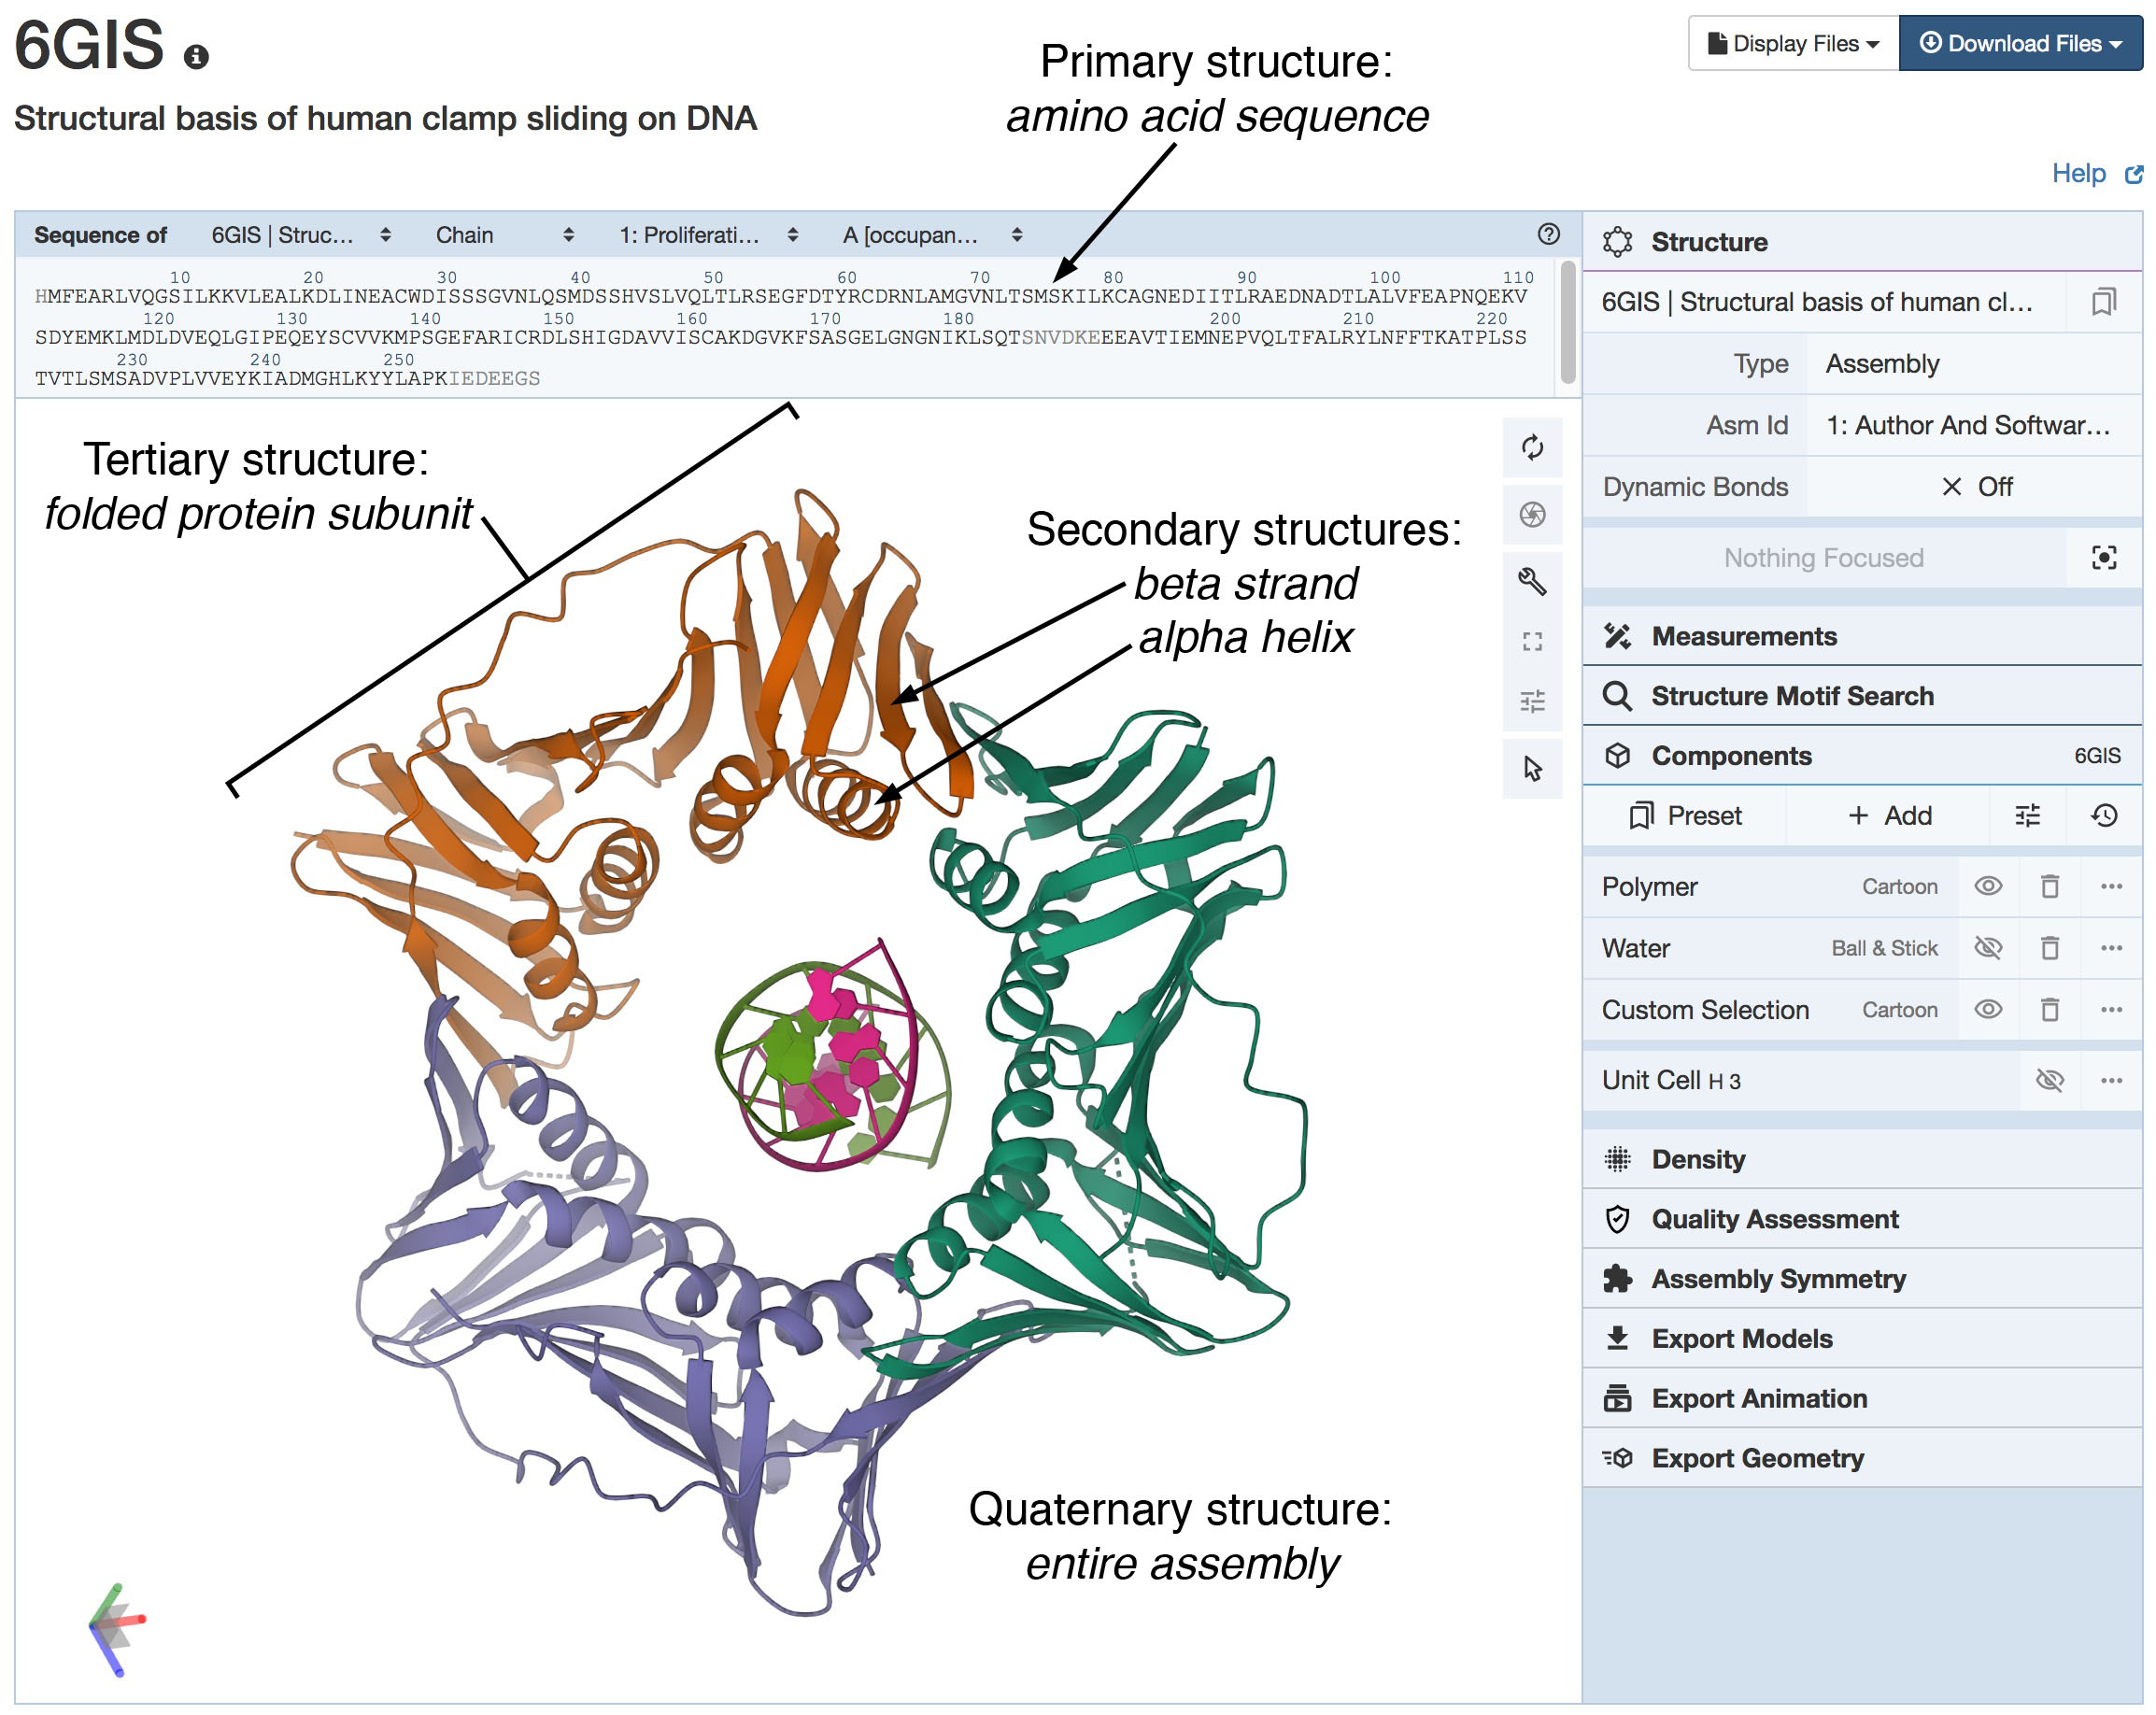

In [ ]:
from IPython.display import Image
Image('3D Protein Structure.jpg', width=750)

BLUEJACK CASE

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Bio
from Bio.Seq import Seq

In [ ]:
seqA = Seq('ATGCGTTTATGACGTATCTGAAGTCTACTAGGGTGATCTGACTAA')
seqB = Seq('GTGTTAGTGCGCTAGTGCTGACTAGGTACAGTAGCTAGTTACTAG')

print('Seq A:', seqA)
print('Seq B:', seqB)

Seq A: ATGCGTTTATGACGTATCTGAAGTCTACTAGGGTGATCTGACTAA
Seq B: GTGTTAGTGCGCTAGTGCTGACTAGGTACAGTAGCTAGTTACTAG


In [ ]:
mRNA_A = seqA.transcribe()
mRNA_B = seqB.transcribe()

print(mRNA_A)
print(mRNA_B)

AUGCGUUUAUGACGUAUCUGAAGUCUACUAGGGUGAUCUGACUAA
GUGUUAGUGCGCUAGUGCUGACUAGGUACAGUAGCUAGUUACUAG


In [ ]:
mRNA_C = mRNA_A[:24:] + mRNA_B[len(seqB) - 21::]
print(mRNA_C)
print(len(mRNA_C))

AUGCGUUUAUGACGUAUCUGAAGUGGUACAGUAGCUAGUUACUAG
45


In [ ]:
print(mRNA_A.translate())
print(mRNA_B.translate())
print(mRNA_C.translate())

MRL*RI*SLLG*SD*
VLVR*C*LGTVASY*
MRL*RI*SGTVASY*


In [ ]:
seqC = mRNA_C.back_transcribe()
print(seqC)

ATGCGTTTATGACGTATCTGAAGTGGTACAGTAGCTAGTTACTAG


In [ ]:
print(seqA.complement())
print(seqB.complement())
print(seqC.complement())

TACGCAAATACTGCATAGACTTCAGATGATCCCACTAGACTGATT
CACAATCACGCGATCACGACTGATCCATGTCATCGATCAATGATC
TACGCAAATACTGCATAGACTTCACCATGTCATCGATCAATGATC
